# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 24 марта 18:00 Сдача **очная** на занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь***

$$ w_{new} = w_{old} - {\alpha}({\nabla}_{w}(L(w_{old})) $$

$$ L(w) = \frac{1}{N}\left[\sum_i (y_i - (x_i, w)) ^ 2 \right] + \frac{1}{C}R(w) $$

$$ R(w) = w ^ 2 $$

$$ {\nabla}_w(L(w)) = \frac{2}{N}  {\sum_i}x_i\bigl((x_i,w) - y_i\bigr) + \frac{2}{C}w $$

$$ w_{new} = \bigl(1 - \frac{2\alpha}{C}\bigr)w_{old} - \frac{2\alpha}{N}  {\sum_i}x_i\bigl((x_i,w) - y_i\bigr) $$

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Ваше решение здесь***

$$ w_{new} = w_{old} - {\alpha}({\nabla}_{w}(L(w_{old})) $$

$$ L(w) = -\frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w) = $$

$$-\frac{1}{N}\left[\sum_i y_i \log \sigma((x_i,w)) + ( 1 - y_i) \log (1 - \sigma((x_i,w))) \right] +  \frac{1}{C}R(w)$$

$$  R(w) = w ^ 2 $$

$$\sigma((x_i,w)) = \frac{1}{1 + \exp(-(x_i,w))} = k$$



$$\nabla_w\sigma((x_i,w)) = \frac{-x_i\exp(-(x_i,w))}{\bigl(1 + \exp(-(x_i,w))\bigr)^2} = m$$

$$ \nabla_w(L(w) - R(w)) = -\frac{1}{N}\sum_i \left[y_i\frac{m}{k} + (y_i - 1) \frac{m}{1-k} \right] = $$

$$  = \frac{1}{N}\sum_ix_i\left[ \frac{-y_i\exp(-(x_i,w))}{1 + \exp(-(x_i,w))} + \frac{1 - y_i}{1 + \exp(-(x_i,w))} \right] = $$

$$  = \frac{1}{N}\sum_ix_i \bigl[ \frac{1}{1 + \exp(-(x_i,w))} - y_i\bigr] = \frac{1}{N}\sum_ix_i \bigl[ \sigma((x_i,w)) - y_i\bigr] $$

$$ w_{new} = \bigl(1 - \frac{2\alpha}{C}\bigr)w_{old} - \frac{\alpha}{N}\sum_ix_i \bigl[ \sigma((x_i,w)) - y_i\bigr] $$

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Ваше решение здесь***

$$ Q(w) = \frac{1}{N}(Xw - y)^T(Xw - y) $$

$$\nabla_wQ(w) = 2X^TXw − 2X^Ty $$

$$ w = X^{-1}y $$

$$\nabla^2_w = 2X^TX$$

$$ H = \det(2X^TX) $$

$ rank(X) $ равен числу столбцов матрицы $X => $ матрица $ X^TX $ имеем максимальный ранг $ => H \neq 0$

И так как для любой матрицы $A$ матрица $A^TA$ будет положительно определена, то $H > 0 => $ имеем минимум функции в точке $ w = X^{-1}y $

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ваше решение здесь***

$p(y_i = 1|x_i) = p, p(y_i = 0|x_i) = q = 1 - p$

$ E(L|x_i) = -p\log(a) - (1 - p)\log(1 - a)$

$$\frac{\partial E}{\partial{a}} = -\frac{p}{a} + \frac{1 - p}{1 - a} = 0$$

$$p(a - 1) + a(1 - p) = 0$$

$a - p = 0 => a = p $ - точка минимума ($a < p => \frac{\partial E}{\partial{a}} < 0, a > p => \frac{\partial E}{\partial{a}} > 0$)

Вспоминаем, что $p = p(y_i = 1|x_i)$ - чтд.

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***

Нет, так как $w_0$ отвечает за смещение нашей гиперплоскости, которое может быть любое, поэтому нам не надо его минимизировать

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [3]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [4]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [5]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [6]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [2]:
import numpy as np

def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    s = np.arange(X.shape[0])
    if shuffle:
        np.random.shuffle(s)
    X = X[s]
    y = y[s]
    for i in range(0, X.shape[0] - batch_size + 1, batch_size):
        X_batch = X[i: i + batch_size]
        y_batch = y[i: i + batch_size]
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [51]:
x = np.arange(27).reshape((9, 3))
y = np.arange(9).reshape((9, 1))
gen = batch_generator(x, y, batch_size=3)
for i, res in enumerate(gen):
    x_b, y_b = res
    print(x_b, y_b, sep = '\n', end='\n\n')

[[21 22 23]
 [18 19 20]
 [ 6  7  8]]
[[7]
 [6]
 [2]]

[[24 25 26]
 [ 0  1  2]
 [ 3  4  5]]
[[8]
 [0]
 [1]]

[[12 13 14]
 [15 16 17]
 [ 9 10 11]]
[[4]
 [5]
 [3]]



In [32]:
#%%pycodestyle

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    
    ## Your code Here
    sigm_value_x = 1 / (1 + np.exp(-x))
    
    return sigm_value_x


from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg', batch_size=1):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.batch_size = batch_size
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        
    def calc_loss(self, X_batch, y_batch):
        w = self.weights
        N = X_batch.shape[0]
        if self.model_type == 'lin_reg':
            loss = 1 / N * (y_batch - np.dot(X_batch, w)) ** 2
        elif self.model_type == 'log_reg':
            a = sigmoid(np.dot(X_batch, w))
            l1 = np.dot(y_batch, np.log(a))
            l2 = np.dot((1 - y_batch), np.log(1 - a))
            loss = - 1 / N * np.sum(l1 + l2)
            
            
        w[0] = 0
        
        reg = 1 / self.C * np.dot(w, w)
        
        loss += reg
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        
        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        w = self.weights
        N = X_batch.shape[0]
        if self.model_type == 'lin_reg':
            loss_grad = 2 / N * np.dot(np.dot(X_batch, w) - y_batch, X_batch)
        elif self.model_type == 'log_reg':
            a = sigmoid(np.dot(X_batch, w))
            loss_grad = - 1 / N * np.dot((a - y_batch), X_batch).T
            
            
        w[0] = 0
        
        reg = 2 / self.C * w
        loss_grad += reg
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        
        return loss_grad
    
    def update_weights(self, new_grad):
        self.weights = self.weights - self.alpha * new_grad
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        
        # Нужно инициализровать случайно веса
        self.weights = np.random.normal(0, 1, X.shape[1] + 1)
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, batch_size=self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                o = np.ones((X_batch.shape[0], 1))
                X_batch = np.concatenate((o, X_batch), axis=1)
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                # batch_loss = self.calc_loss(X_batch, y_batch)
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
                
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        if self.model_type == 'lin_reg':
            predict = np.matmul(X, self.weights)
        elif self.model_type == 'log_reg':
            predict = np.round(np.matmul(X, self.weights))
            
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
        return predict

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [1]:
def plot_decision_boundary(clf):
    ## Your code Here
    w = clf.weights
    a = w[0]
    b = w[1]
    c = w[2]
    ## a + bx + cy = 0
    ## y = (b * x - a) / c 
    x = np.linspace(-4, 8, 50)
    y = (0.5 - b * x - a) / c
#     y = a * x + b
    plt.plot(x, y)

In [15]:
print(clf_lin.weights, clf_log.weights, sep='\n\n')

[[-0.12552549]
 [ 0.09388019]
 [-0.15713621]]

[[-5.26180552]
 [ 1.09690771]
 [-1.28120038]]


(400, 2)


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log


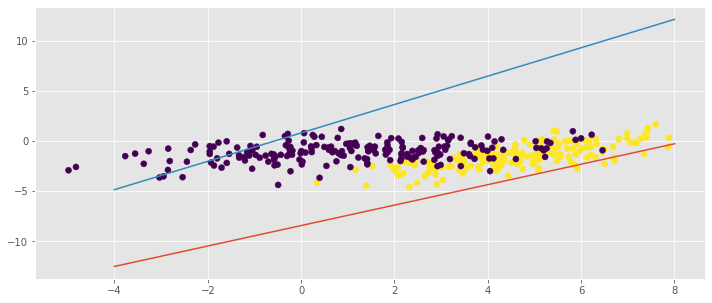

In [33]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]
clf_lin = MySGDClassifier(batch_generator, model_type='lin_reg', C=1000, max_epoch=100)
clf_log = MySGDClassifier(batch_generator, model_type='log_reg', C=1000, max_epoch=10)
print(X.shape)
clf_lin.fit(X, y)
clf_log.fit(X, y)

plot_decision_boundary(clf_lin)
plot_decision_boundary(clf_log)

plt.scatter(X[:,0], X[:,1],  c=y)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [289]:
from sklearn.datasets import make_classification

In [322]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

Text(0, 0.5, 'loss')

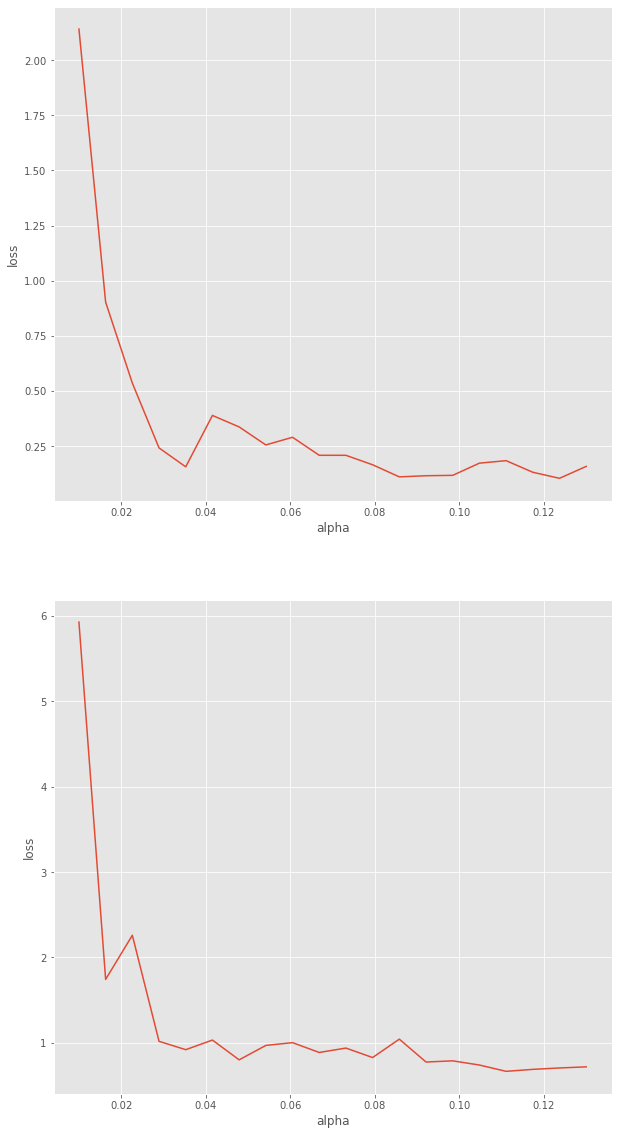

In [326]:
## Your Code Here
fig, axis = plt.subplots(2, figsize=(10, 20))
samples = X.shape[0]
N = 10
bs = samples // N
length = 20
x = np.linspace(0.01, 0.13, length)
y_lin = np.zeros(x.shape)
y_log = np.zeros(x.shape)
i = 0
for alpha in x:
    clf = MySGDClassifier(batch_generator, alpha=alpha, batch_size=bs)
    res = clf.fit(X, y)
    loss = np.mean(res.errors_log['loss'])
    y_lin[i] = loss
    clf = MySGDClassifier(batch_generator, alpha=alpha, batch_size=bs, model_type='log_reg')
    res = clf.fit(X, y)
    loss = np.mean(res.errors_log['loss'])
    y_log[i] = loss
    i += 1
axis[0].plot(x, y_lin)
axis[1].plot(x, y_log)
axis[0].set_xlabel("alpha")
axis[1].set_xlabel("alpha")
axis[0].set_ylabel("loss")
axis[1].set_ylabel("loss")

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

In [129]:
## Your Code Here

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [402]:
import pandas as pd
title_data = pd.read_csv('docs_titles.tsv', sep='\t', encoding='utf-8', lineterminator='\n')
title_data.head()

,doc_id,title
0,15731,ВАЗ 21213 | Замена подшипников ступицы | Нива
1,14829,"Ваз 2107 оптом в Сочи. Сравнить цены, купить п..."
2,15764,Купить ступица Лада калина2. Трансмиссия - пер...
3,17669,Классика 21010 - 21074
4,14852,Ступица Нива — замена подшипника своими руками


In [403]:
title_vals = title_data.values

In [404]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
train_data.head()

,pair_id,group_id,doc_id,target
0,1,1,15731,0
1,2,1,14829,0
2,3,1,15764,0
3,4,1,17669,0
4,5,1,14852,0


In [405]:
train_data.describe()

,pair_id,group_id,doc_id,target
count,11690.000000,11690.000000,11690.000000,11690.000000
mean,5845.500000,65.321386,13834.891873,0.287511
std,3374.756658,37.096226,8412.887536,0.452621
min,1.000000,1.000000,1.000000,0.000000
25%,2923.250000,33.000000,6477.250000,0.000000
50%,5845.500000,66.000000,13568.500000,0.000000
75%,8767.750000,98.000000,21550.250000,1.000000
max,11690.000000,129.000000,28025.000000,1.000000


In [454]:
import sklearn, re
new_doc = title_data

clf = MySGDClassifier(batch_generator)

def clear_data(data, target):
    data = [re.sub('[\W]', ' ', str(data[i])) for i in range(len(data))]
    data = [re.sub(' [a-z]{1,2} ', ' ', data[i].lower()) for i in range(len(data))]
    
    d = []
    y = []

    for i in range(len(data)):
        if len(data[i].split()):
            d.append(data[i])
            y.append(target[i])
    return d, np.asarray(y)

for group in np.unique(train_data['group_id']):
    res = train_data[train_data['group_id'] == group][['doc_id', 'target']].values
    ids = res[:,0]
    target = res[:,1]
    titles = title_data[title_data['doc_id'].isin(ids)]['title'].values
    d, y = clear_data(titles, target)
    vectorizer = sklearn.feature_extraction.text.TfidfVectorizer()
    X = vectorizer.fit_transform(d).toarray()
    clf.fit(X, y)

In [465]:
np.unique(train_data['group_id']).shape

(129,)

0.1814114627887083


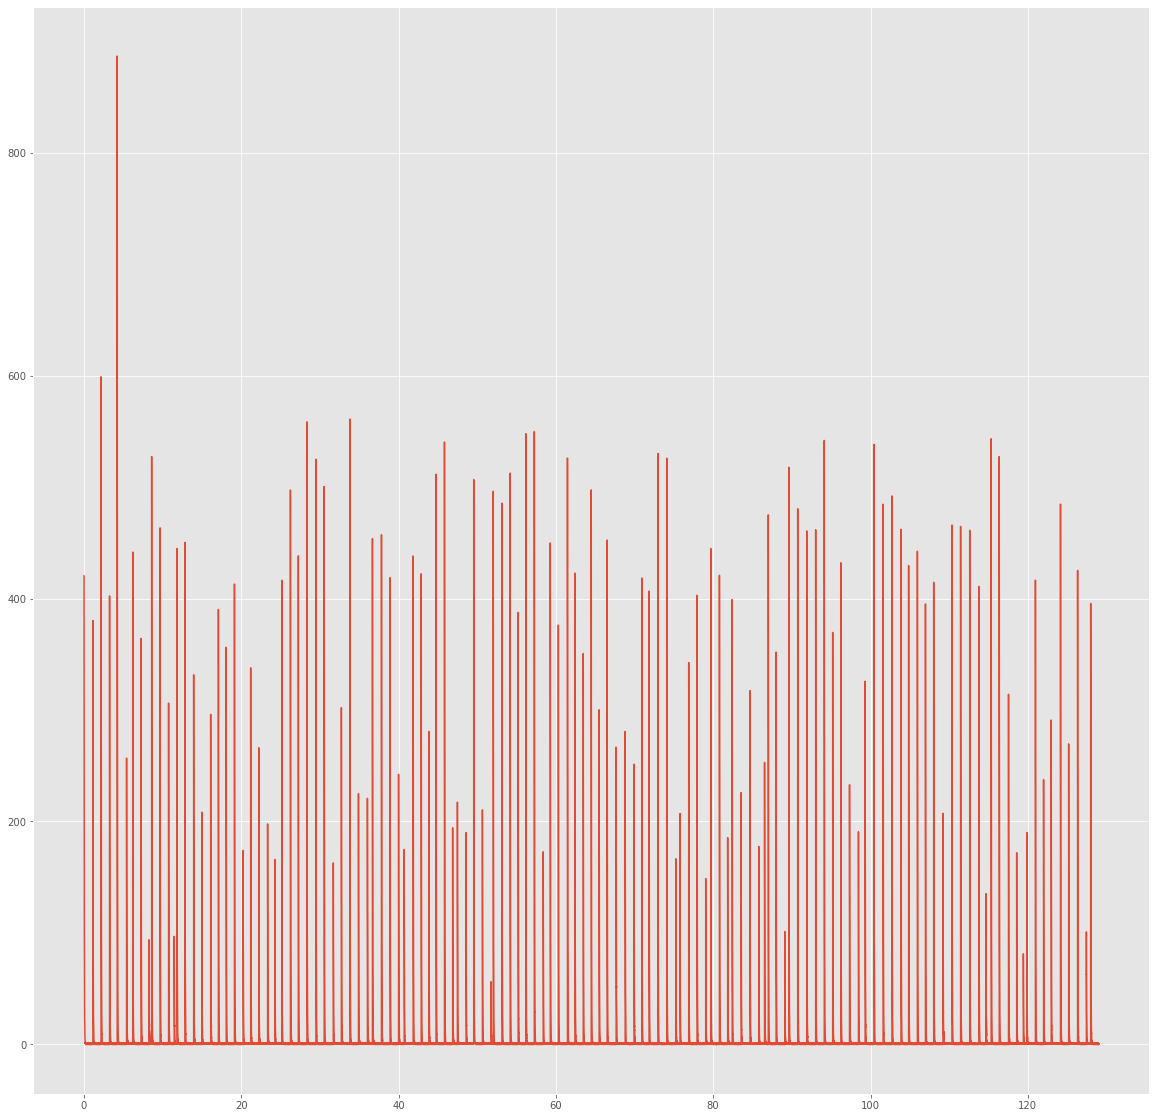

In [476]:
loss = np.asarray(clf.errors_log['loss'])
loss = loss.reshape(loss.shape[0])
print(loss[loss > 1].shape[0] / loss.shape[0])
x = np.linspace(0, 129, loss.shape[0])
fig, ax = plt.subplots(1, figsize=(20, 20))
ax.plot(x, loss)

In [452]:
test_data = pd.read_csv("test_groups.csv")
test_data.head()

,pair_id,group_id,doc_id
0,11691,130,6710
1,11692,130,4030
2,11693,130,5561
3,11694,130,4055
4,11695,130,4247


In [6]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [10]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***